In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv(r"C:\Users\tusha\OneDrive\Desktop\Python_Notes\assignment_datasets\Regression_Data\Train.csv",encoding='utf-8')

In [4]:
dataset.head(n=10)

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
5,-1.055329,-0.874807,0.580753,-0.773541,1.070888,-122.405263
6,-0.824707,0.499427,1.293281,-0.240671,-0.419136,1.413741
7,-1.936602,0.583708,-0.521135,-0.631724,-1.030729,-13.306543
8,0.647431,-0.265401,0.327080,0.457829,-1.757592,-25.754698
9,-1.133029,-0.839132,-0.547809,0.551768,-0.639173,-57.077754


In [5]:
X = dataset.values[:,:5]
Y = dataset.target
print(X.shape)
Y = Y.values.reshape((-1,1))
print(Y.shape)
print(X.shape)

#Normalize
X= (X-X.mean())/X.std()
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
X[:,:5]

(1600, 5)
(1600, 1)
(1600, 5)
(1600, 6)


array([[ 1.        ,  0.31139642, -0.92093003, -0.3992678 ,  0.42418404],
       [ 1.        , -0.81200658, -0.16864243, -0.75264729, -1.02857829],
       [ 1.        ,  0.25471295,  0.15168305, -0.12736142,  0.71564009],
       ...,
       [ 1.        ,  1.05810433, -0.87478823,  1.74062205, -1.84139222],
       [ 1.        , -1.24275748,  0.01453923,  1.8672047 , -1.05496863],
       [ 1.        , -1.85426585, -0.8252779 , -1.42486653,  0.50553954]])

In [6]:
def hypothesis(X,theta):
    hp=np.dot(X,theta)
    
    return hp
    

In [7]:
#cost function calculation
def cost_function(X,Y,theta):
    m=X.shape[0]
    cost=0
    for i in range(m):
        cost+=(Y[i]-hypothesis(X[i],theta))**2
    
    return cost/(2*m)#calculate hypothesis

#computing gradient
def gradient(X,Y,theta):
    grad=np.zeros((X.shape[1]))
    for j in range(X.shape[1]):
        for i in range(X.shape[0]):
               grad[j]+=((Y[i]-hypothesis(X[i],theta))*X[i,j])
    return grad

#optimizing theta with gradient computed
def optimization(X,Y,alpha=0.0001,iterations=1000):
    
    theta=np.ones((X.shape[1]))
    
    error=[]
    for i in range(iterations):
        error.append(cost_function(X,Y,theta))
        theta=theta+alpha*gradient(X,Y,theta)
       
       
    return theta,error

In [8]:
final_theta,error = optimization(X,Y)

In [23]:
y_p=hypothesis(X,final_theta)

In [24]:
y_p.reshape((1600,1))


array([[ -57.87196311],
       [ -89.46019557],
       [  53.95305942],
       ...,
       [-115.65802541],
       [ -64.27649688],
       [-116.11442895]])

In [25]:
Y.shape

(1600, 1)

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(Y,y_p)

0.9660939669975617

In [28]:
final_theta

array([ 1.49138699, 29.84297081, 93.16540718,  8.32556432, 45.01071403,
        2.53283406])

In [29]:
dataset_Test = pd.read_csv(r"C:\Users\tusha\OneDrive\Desktop\Python_Notes\assignment_datasets\Regression_Data\Test.csv",encoding='utf-8')

In [30]:
import matplotlib.pyplot as plt

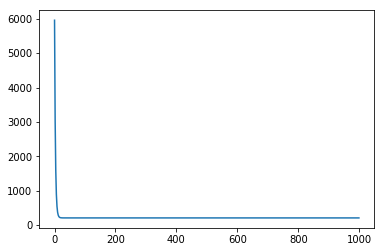

In [31]:
plt.plot(error)

In [35]:
X_test = dataset_Test.values[:,:5]
Y_test = dataset_Test.target
print(X_test.shape)
Y_test = Y_test.values.reshape((-1,1))
print(Y_test.shape)
print(X_test.shape)

#Normalize
X_test= (X_test-X_test.mean())/X_test.std()
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))
print(X_test.shape)
X_test[:,:5]

(400, 5)
(400, 1)
(400, 5)
(400, 6)


array([[ 1.        ,  0.22855473, -1.48705913,  0.45960159,  0.90751979],
       [ 1.        , -0.92627959, -0.62986836,  0.7661864 ,  1.43672436],
       [ 1.        ,  0.73048035, -0.10301315, -0.05991801, -1.80902571],
       ...,
       [ 1.        , -0.24082017, -1.21798634, -0.15913792,  1.12634773],
       [ 1.        ,  0.29114208,  0.7439835 , -0.44531199,  0.76800259],
       [ 1.        , -0.00396518, -1.02549769, -1.07377667, -0.45969975]])

In [36]:
y_p_test=hypothesis(X_test,final_theta)
print(y_p_test)

[-8.61211901e+01 -1.63932171e+01 -6.73825235e+01 -2.41167951e+02
 -2.85431318e+01 -1.77451522e+02 -1.58119696e+02  1.89119294e+01
 -1.03165185e+01 -6.25797309e+01  1.06234387e+02  2.04405341e+01
  1.60816474e+02 -9.51531705e+01  4.70623865e+01  3.26640435e+01
  1.31874905e+02  1.09523897e+02  4.48118684e+01  2.84429453e+01
  6.57947307e+01  3.48004649e+01  6.44138587e+01 -8.39633318e+01
  1.16587991e+02  2.24383411e+01 -3.42695493e+01  1.32633769e+02
 -4.63787742e+01  1.35691727e+02  4.36492235e+01 -2.57545689e+01
 -1.65612745e+02 -1.22400336e+02 -9.07463104e+01 -5.05827687e+01
 -5.41088509e+01  7.23478440e+01 -1.18893380e+02 -1.68016091e+00
  1.69444471e+02 -8.46437437e+01 -1.24878212e+02  3.75509020e+01
 -6.39093528e+01  7.88278962e+01  1.04534869e+02  1.30224563e+02
 -1.28168346e+01 -9.98241742e+01 -3.67649220e+01  1.86011776e+02
 -1.70686710e+01  1.45078958e+02 -1.56016423e+02 -1.73617257e+02
  3.95524521e+01 -1.57871709e+02 -2.20024746e+01  3.86695653e+01
 -9.04311132e+01 -3.00358

In [34]:
r2_score(Y_test,y_p_test)

0.8735247664869861